In [13]:
import torch
import numpy as np
import os
import cma
# from eval import play
import random

from gan.config import BaseConfig, ZeldaConfig, MarioConfig,BoulderdashConfig
from gan.models.general_models import Generator
from gan.level_visualizer import GVGAILevelVisualizer,MarioLevelVisualizer
from gan.game.env import Game
from gan.game.zelda import Zelda
from gan.game.mario import Mario
from gan.game.boulderdash import Boulderdash
from torchvision.utils import make_grid
import torchvision.transforms as transforms
from PIL import Image


In [24]:
game = Mario()
config = MarioConfig()
config.set_env(game)

def get_model(game: Game, config: BaseConfig):
    # reproducible settings
    random.seed(config.seed)
    np.random.seed(config.seed)
    torch.manual_seed(config.seed)
    torch.cuda.manual_seed(config.seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    device = torch.device('cpu')
    # device = torch.device(
    #     f'cuda:{config.gpu_id}' if torch.cuda.is_available() else 'cpu')
    generator = Generator(
        isize=game.input_shape[1], nz=config.latent_size, nc=game.input_shape[
            0], ngf=config.generator_filters, self_attention=config.use_self_attention_g, n_extra_layers=config.extra_layers_g
    ).to(device)
    return generator

level_visualizer = MarioLevelVisualizer(game, config.data_path)
generator = get_model(game, config)
model_save_path = "/root/mnt/pcg/GVGAI-GAN/gan/checkpoints/mario_v0/full-35"
model_dict = torch.load(os.path.join(model_save_path, "latest.tar"))
generator.load_state_dict(model_dict['generator'])


<All keys matched successfully>

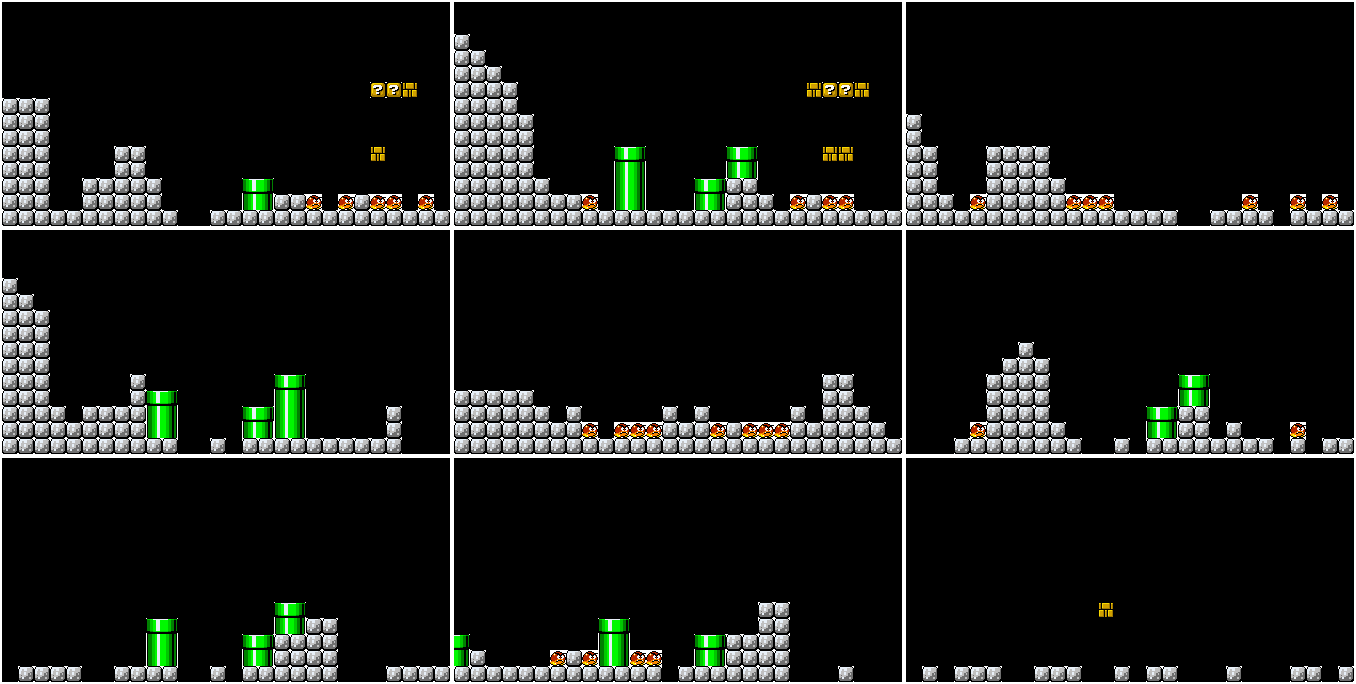

In [27]:
latents = torch.randn((100,32))
level_tensor, _ = generator(
    latents, None)
level_strs = game.level_tensor_to_strs(
    level_tensor)

playable_levels = []
for level_str in level_strs:
    if game.check_playable(level_str):
        playable_levels.append(level_str)

p_level_img = [
    torch.tensor(
        np.array(level_visualizer.draw_level(lvl)).transpose(
            2, 0, 1
        )
        / 255.0
    )
    for lvl in playable_levels[:9]
]
# # 非プレイアブルなステージを強調
# for i, p in enumerate(playables):
#     if not p:
#         p_level_img[i][0] += 0.2
grid_level_torch_img = make_grid(
    p_level_img, nrow=3, padding=0)
grid_level_pil_img = transforms.functional.to_pil_image(
    grid_level_torch_img)

grid_level_pil_img

In [18]:
game = Zelda('v1')
config = ZeldaConfig()
config.set_env(game)


def get_model(game: Game, config: BaseConfig):
    # reproducible settings
    random.seed(config.seed)
    np.random.seed(config.seed)
    torch.manual_seed(config.seed)
    torch.cuda.manual_seed(config.seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    device = torch.device('cpu')
    # device = torch.device(
    #     f'cuda:{config.gpu_id}' if torch.cuda.is_available() else 'cpu')
    generator = Generator(
        isize=game.input_shape[1], nz=config.latent_size, nc=game.input_shape[
            0], ngf=config.generator_filters, self_attention=config.use_self_attention_g, n_extra_layers=config.extra_layers_g
    ).to(device)
    return generator


level_visualizer = GVGAILevelVisualizer(game)
generator = get_model(game, config)
model_save_path = "/root/mnt/pcg/GVGAI-GAN/gan/checkpoints/zelda_v1/full-74"
model_dict = torch.load(os.path.join(model_save_path, "latest.tar"))
generator.load_state_dict(model_dict['generator'])


<All keys matched successfully>

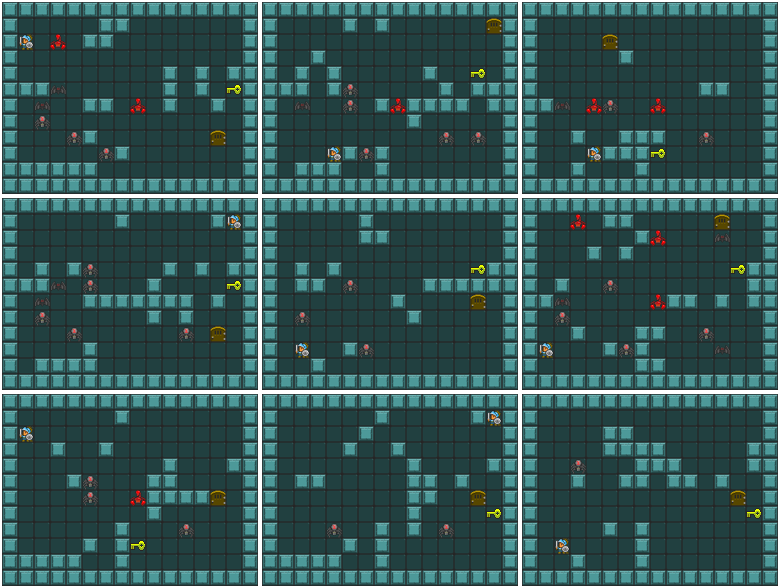

In [19]:
latents = torch.randn((100, 32))
level_tensor, _ = generator(
    latents, None)
level_strs = game.level_tensor_to_strs(
    level_tensor)

playable_levels = []
for level_str in level_strs:
    if game.check_playable(level_str):
        playable_levels.append(level_str)

p_level_img = [
    torch.tensor(
        np.array(level_visualizer.draw_level(lvl)).transpose(
            2, 0, 1
        )
        / 255.0
    )
    for lvl in playable_levels[:9]
]
# # 非プレイアブルなステージを強調
# for i, p in enumerate(playables):
#     if not p:
#         p_level_img[i][0] += 0.2
grid_level_torch_img = make_grid(
    p_level_img, nrow=3, padding=0)
grid_level_pil_img = transforms.functional.to_pil_image(
    grid_level_torch_img)

grid_level_pil_img


In [21]:
game = Boulderdash()
config = BoulderdashConfig()
config.set_env(game)


def get_model(game: Game, config: BaseConfig):
    # reproducible settings
    random.seed(config.seed)
    np.random.seed(config.seed)
    torch.manual_seed(config.seed)
    torch.cuda.manual_seed(config.seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    device = torch.device('cpu')
    # device = torch.device(
    #     f'cuda:{config.gpu_id}' if torch.cuda.is_available() else 'cpu')
    generator = Generator(
        isize=game.input_shape[1], nz=config.latent_size, nc=game.input_shape[
            0], ngf=config.generator_filters, self_attention=config.use_self_attention_g, n_extra_layers=config.extra_layers_g
    ).to(device)
    return generator


level_visualizer = GVGAILevelVisualizer(game)
generator = get_model(game, config)
model_save_path = "/root/mnt/pcg/GVGAI-GAN/gan/checkpoints/boulderdash_v0/full-44"
model_dict = torch.load(os.path.join(model_save_path, "latest.tar"))
generator.load_state_dict(model_dict['generator'])


<All keys matched successfully>

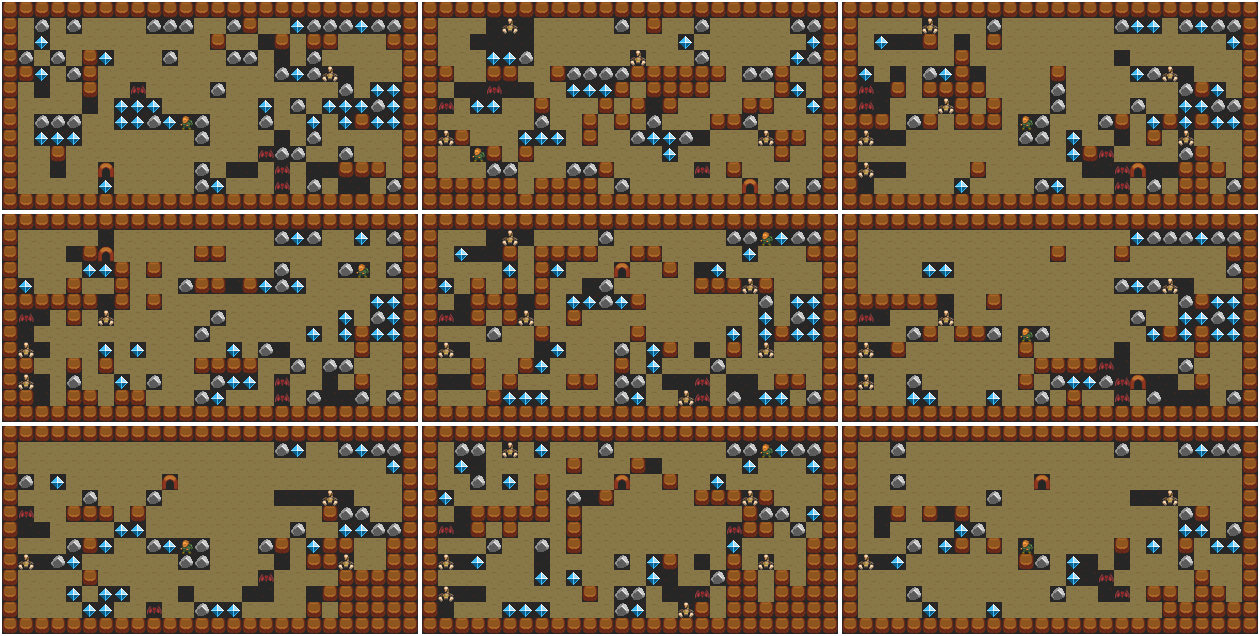

In [22]:
latents = torch.randn((100, 32))
level_tensor, _ = generator(
    latents, None)
level_strs = game.level_tensor_to_strs(
    level_tensor)

playable_levels = []
for level_str in level_strs:
    if game.check_playable(level_str):
        playable_levels.append(level_str)

p_level_img = [
    torch.tensor(
        np.array(level_visualizer.draw_level(lvl)).transpose(
            2, 0, 1
        )
        / 255.0
    )
    for lvl in playable_levels[:9]
]
# # 非プレイアブルなステージを強調
# for i, p in enumerate(playables):
#     if not p:
#         p_level_img[i][0] += 0.2
grid_level_torch_img = make_grid(
    p_level_img, nrow=3, padding=0)
grid_level_pil_img = transforms.functional.to_pil_image(
    grid_level_torch_img)

grid_level_pil_img
